In [188]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools
import keras

In [189]:
#pretty plots
%matplotlib inline

#Load the index data
raw_data = pd.read_csv('new_index_data.csv', skiprows=1, parse_dates=['Date']).set_index(['Date'])
raw_data.head()

,Close,High,Low,Ask,Bid,20D Vol,MA5,MA15,MA12,MA20,...,CFPS_NTM,EVEBIT_LTM,EVEBIT_NTM,DY_LTM,DY_NTM,ADV_VOL,PAYOUT,ANALYST_SENTIMENT,EPS_GRW_FY1,EPS_GRW_FY2
Date,,,,,,,,,,,,,,,,,,,,,
2007-09-04,23886.07,24127.16,23855.11,24127.16,24127.16,2.334275,23655.889,23065.137,22614.459,22494.203,...,2115.383802,16.203516,15.886350,2.784339,2.894377,69.555725,48.307102,1.725886,31.040968,1.891823
2007-09-05,24069.17,24283.15,23839.00,24283.15,24283.15,2.267374,23865.602,23271.266,22794.023,22570.828,...,2104.485308,16.342716,16.074106,2.767348,2.867314,24.265623,48.267351,1.741908,30.716929,1.878484
2007-09-06,24050.40,24089.06,23853.05,24089.06,24089.06,2.262485,23978.773,23464.688,23019.223,22651.379,...,2109.322889,16.296972,16.005113,2.775339,2.878880,88.845002,48.288397,1.696151,31.336520,1.861943
2007-09-07,23982.61,24135.24,23881.72,24135.24,24135.24,2.135004,23978.469,23600.998,23258.922,22760.875,...,2113.587271,16.212587,15.846681,2.779898,2.884462,82.548551,48.422173,1.542342,30.709678,1.534219
2007-09-10,23999.70,24123.66,23578.11,24123.66,24123.66,2.136951,23997.590,23687.059,23419.193,22866.305,...,2022.039445,16.486340,16.268229,2.719714,2.813812,8.004477,47.967055,2.253999,35.256382,2.376230


In [190]:
labels = np.log(raw_data['Close'].shift(-1)/raw_data['Close'])
labels = labels.drop(labels.index[-1:])
raw_data = raw_data.drop(raw_data.index[-1:])

In [191]:
raw_data.head()

,Close,High,Low,Ask,Bid,20D Vol,MA5,MA15,MA12,MA20,...,CFPS_NTM,EVEBIT_LTM,EVEBIT_NTM,DY_LTM,DY_NTM,ADV_VOL,PAYOUT,ANALYST_SENTIMENT,EPS_GRW_FY1,EPS_GRW_FY2
Date,,,,,,,,,,,,,,,,,,,,,
2007-09-04,23886.07,24127.16,23855.11,24127.16,24127.16,2.334275,23655.889,23065.137,22614.459,22494.203,...,2115.383802,16.203516,15.886350,2.784339,2.894377,69.555725,48.307102,1.725886,31.040968,1.891823
2007-09-05,24069.17,24283.15,23839.00,24283.15,24283.15,2.267374,23865.602,23271.266,22794.023,22570.828,...,2104.485308,16.342716,16.074106,2.767348,2.867314,24.265623,48.267351,1.741908,30.716929,1.878484
2007-09-06,24050.40,24089.06,23853.05,24089.06,24089.06,2.262485,23978.773,23464.688,23019.223,22651.379,...,2109.322889,16.296972,16.005113,2.775339,2.878880,88.845002,48.288397,1.696151,31.336520,1.861943
2007-09-07,23982.61,24135.24,23881.72,24135.24,24135.24,2.135004,23978.469,23600.998,23258.922,22760.875,...,2113.587271,16.212587,15.846681,2.779898,2.884462,82.548551,48.422173,1.542342,30.709678,1.534219
2007-09-10,23999.70,24123.66,23578.11,24123.66,24123.66,2.136951,23997.590,23687.059,23419.193,22866.305,...,2022.039445,16.486340,16.268229,2.719714,2.813812,8.004477,47.967055,2.253999,35.256382,2.376230


In [192]:
raw_data.tail()

,Close,High,Low,Ask,Bid,20D Vol,MA5,MA15,MA12,MA20,...,CFPS_NTM,EVEBIT_LTM,EVEBIT_NTM,DY_LTM,DY_NTM,ADV_VOL,PAYOUT,ANALYST_SENTIMENT,EPS_GRW_FY1,EPS_GRW_FY2
Date,,,,,,,,,,,,,,,,,,,,,
2017-08-28,27863.29,28071.59,27806.05,28071.59,28071.59,0.875589,27557.280,27361.664,27442.822,27460.380,...,3059.388629,18.397000,16.700131,3.470344,3.419362,60.941742,42.145093,2.588387,12.190886,9.410051
2017-08-29,27765.01,27839.83,27638.73,27839.83,27839.83,0.842051,27679.346,27388.414,27447.799,27482.432,...,3076.070795,18.338933,16.586026,3.484232,3.439634,28.301463,42.104409,2.847597,12.728385,9.437849
2017-08-30,28094.61,28127.90,27912.82,28127.90,28127.90,0.863677,27817.934,27489.340,27463.777,27510.150,...,3084.061452,18.414169,16.704278,3.460883,3.404600,93.887806,42.017144,3.337074,12.476248,9.511493
2017-08-31,27970.30,27994.06,27861.48,27994.06,27994.06,0.871280,27908.273,27549.346,27477.992,27528.297,...,3074.443097,18.357814,16.638955,3.480608,3.426112,14.842826,41.959440,3.526867,13.036804,9.299698
2017-09-01,27953.16,28116.70,27915.44,28116.70,28116.70,0.868149,27929.273,27614.195,27511.936,27549.404,...,3078.072053,18.382341,16.671038,3.487315,3.434706,34.408919,41.943974,3.516994,13.146061,9.300045


In [193]:
#Generate labels
labels_cutoff = 0.00067
y = np.empty(labels.shape)
y[labels < -labels_cutoff] = 0 #Label -1 for returns lower than -0.05%
y[labels > labels_cutoff] = 2 #Label 1 for returns greater than 0.05%
y[(labels <= labels_cutoff ) & (labels >= -labels_cutoff)] = 1 #Label 0 for the rest


In [194]:
#Generate Training Data and preproc
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(raw_data)

In [210]:
#Import Keras module
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, advanced_activations
from keras.utils.np_utils import to_categorical
from keras.callbacks import ModelCheckpoint, EarlyStopping

#Import sklearn module
from sklearn.metrics import confusion_matrix

In [196]:
#Split into training set and test set
train_size = 0.8 #Again parameter to tune
val_size = (1 - train_size) * 0.5

train_cut_index = int(np.floor(train_size * X.shape[0]))
val_cut_index = int(np.floor((train_size + val_size) * X.shape[0]))

X_train = X[0:(train_cut_index-1),:]
X_val = X[train_cut_index:(val_cut_index - 1),:]
X_test = X[val_cut_index:X.shape[0],:]

y_train = y[0:(train_cut_index-1)]
y_val = y[train_cut_index:val_cut_index-1]
y_test = y[val_cut_index:len(y)]

#Preproc the y_train and y_test using to_categorical function
y_train = to_categorical(y_train, num_classes=3)
y_val = to_categorical(y_val, num_classes=3)
y_test = to_categorical(y_test, num_classes=3)

In [197]:
y_train.shape

(1970, 3)

In [198]:
#Prediction Period
print("Number of data points in training set:", X_train.shape[0])
print("Number of data points in validation set:", X_val.shape[0])
print("Number of data points in test set:", X_test.shape[0])

Number of data points in training set: 1970
Number of data points in validation set: 245
Number of data points in test set: 247


In [199]:
#Reshape data for inputting into LSTM
timestep = 1
X_train = np.reshape(X_train, (X_train.shape[0], timestep, X_train.shape[1]))
X_val = np.reshape(X_val, (X_val.shape[0], timestep, X_val.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], timestep, X_test.shape[1]))

y_train = np.reshape(y_train, (y_train.shape[0], timestep, y_train.shape[1]))
y_val = np.reshape(y_val, (y_val.shape[0], timestep, y_val.shape[1]))
y_test = np.reshape(y_test, (y_test.shape[0], timestep, y_test.shape[1]))

In [200]:
#Evaluation metrics
from keras import backend as K

#Define f-beta score
def fbeta(y_true, y_pred, threshold_shift=0):
    beta = 0.6

    # just in case of hipster activation at the final layer
    y_pred = K.clip(y_pred, 0, 1)

    # shifting the prediction threshold from .5 if needed
    y_pred_bin = K.round(y_pred + threshold_shift)

    tp = K.sum(K.round(y_true * y_pred_bin), axis=1) + K.epsilon()
    fp = K.sum(K.round(K.clip(y_pred_bin - y_true, 0, 1)), axis=1)
    fn = K.sum(K.round(K.clip(y_true - y_pred, 0, 1)), axis=1)

    precision = tp / (tp + fp)
    recall = tp / (tp + fn)

    beta_squared = beta ** 2
    return K.mean((beta_squared + 1) * (precision * recall) / (beta_squared * precision + recall + K.epsilon()))

#Define precision score
def precision(y_true, y_pred, threshold_shift=0):

    # just in case of hipster activation at the final layer
    y_pred = K.clip(y_pred, 0, 1)

    # shifting the prediction threshold from .5 if needed
    y_pred_bin = K.round(y_pred + threshold_shift)

    tp = K.sum(K.round(y_true * y_pred_bin), axis=1) + K.epsilon()
    fp = K.sum(K.round(K.clip(y_pred_bin - y_true, 0, 1)), axis=1)

    precision = tp / (tp + fp)

    return precision

In [201]:
#Define plot metrics - can add more metrics towards it

def plot_metrics(model):
       
    #Plotting Loss over Epoch
    plt.figure(1)
    plt.plot(model.history['loss'])
    plt.plot(model.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Training','Validation'], loc='upper left')
    
    #Plotting F-beta over Epoch
    plt.figure(2)
    plt.plot(model.history['fbeta'])
    plt.plot(model.history['val_fbeta'])
    plt.title('F-Beta Score, beta=0.6')
    plt.ylabel('F-Beta Score')
    plt.xlabel('Epoch')
    plt.legend(['Training','Validation'], loc='upper left')
    
    #Plotting Precision over Epoch
    plt.figure(3)
    plt.plot(model.history['precision'])
    plt.plot(model.history['val_precision'])
    plt.title('Model Precision')
    plt.ylabel('Precision')
    plt.xlabel('Epoch')
    plt.legend(['Training','Validation'], loc='upper left')
    
    #Plotting Hit Rate over Epoch
    plt.figure(4)
    plt.plot(model.history['acc'])
    plt.plot(model.history['val_acc'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Training','Validation'], loc='upper left')
    
    plt.show()

In [202]:
#Print model evaluation metrics, takes in model scores from training and test set
def print_metrics(model_score):
    print("Test Loss:", model_score[0])
    print("Test F-beta:", model_score[1])
    print("Test Precision:", model_score[2])
    print("Test Accuracy:", model_score[3])

In [203]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        title = "Normalized confusion matrix"
    else:
        title = 'Confusion matrix, without normalization'

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [204]:
#Utility function to return class numbers from probabilities
def prob_to_class(pred):
    return(np.argmax(pred, axis=-1))


In [215]:
#Setting base LSTM Network Parameters
drop_out = 0.65
input_shape = X_train.shape
num_epoch = 100
loss_fcn = 'categorical_crossentropy'
learning_rate = 0.01
opt = optimizers.Nadam(lr=learning_rate)
alpha = 2
num_of_perceptron = np.int(0.5 * (X_train.shape[2] + 3)) * alpha
activation = advanced_activations.LeakyReLU()

In [216]:
#Callbacks
saveModel = ModelCheckpoint(filepath='weights.hdf5', verbose=1, save_best_only=True, mode='auto')
earlyStop = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='auto', min_delta=0.0001)
callbacks = [saveModel, earlyStop]

In [217]:
%%time
#Fit LSTM
from keras.layers import LSTM

#Setting up the instance
lstm_model = Sequential()

#Adding 1st LSTM layer
lstm_model.add(LSTM(num_of_perceptron, input_shape=input_shape[1:], return_sequences=True))
lstm_model.add(activation)
lstm_model.add(Dropout(drop_out))

#lstm_model.add(LSTM(int(num_of_perceptron * 0.5), return_sequences=True))
#lstm_model.add(Dropout(drop_out))

#lstm_model.add(LSTM(15, return_sequences=True))
#lstm_model.add(Dropout(drop_out))

#Adding Output Layer
lstm_model.add(Dense(3, activation='linear'))
lstm_model.summary()

#Optimization
#Define Optimizer, using Stochastic Gradient Decent
lstm_model.compile(loss=loss_fcn, optimizer=opt, metrics=[fbeta, precision, 'accuracy'])

#Fitting the model
lstm = lstm_model.fit(X_train, y_train, epochs = num_epoch, verbose=1, validation_data=(X_val, y_val), shuffle=False, batch_size=1, callbacks=[earlyStop])

#Evaluation
lstm_score = lstm_model.evaluate(X_test, y_test)

#Predict
lstm_pred = lstm_model.predict(X_test, verbose=1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_31 (LSTM)               (None, 1, 30)             6960      
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 1, 30)             0         
_________________________________________________________________
dropout_30 (Dropout)         (None, 1, 30)             0         
_________________________________________________________________
dense_18 (Dense)             (None, 1, 3)              93        
Total params: 7,053
Trainable params: 7,053
Non-trainable params: 0
_________________________________________________________________
Train on 1970 samples, validate on 245 samples
Epoch 1/100
1970/1970 [==============================] - 11s - loss: 7.4967 - fbeta: 0.4726 - precision: 0.7169 - acc: 0.2365 - val_loss: 7.6588 - val_fbeta: 0.6490 - val_precision: 0.8245 - val_acc: 0.4735
Epoch 2/100
1970/1

Test Loss: 9.44480226107
Test F-beta: 0.600539837048
Test Precision: 0.800269896444
Test Accuracy: 0.400809715272


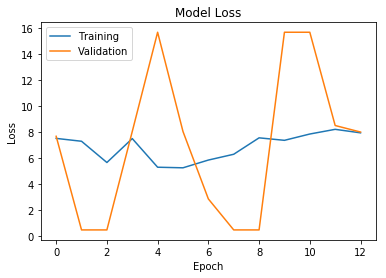

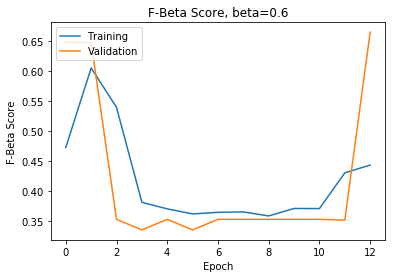

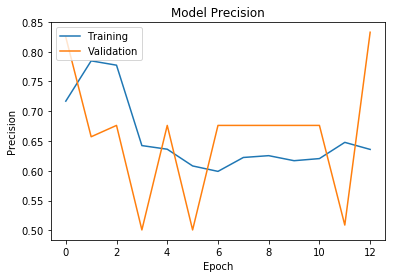

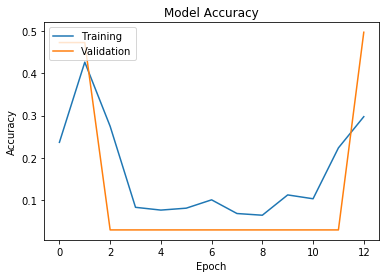

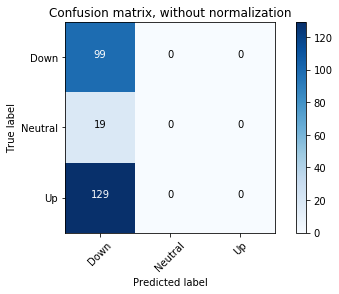

In [218]:
    print_metrics(lstm_score)
    
    plot_metrics(lstm)
    
    cfm = confusion_matrix(prob_to_class(y_test), prob_to_class(lstm_pred)) 
    plot_confusion_matrix(cfm, classes=['Down', 'Neutral', 'Up'], normalize=False)